In [12]:
library(TSA)
library(quantmod)
library(foreign)
library(forecast)

problem 1

estimate covariance bwtn sample autocors between two and three 

Very basic

problem 2

phi and theta between -1 and 1 so  stationary and invetible 


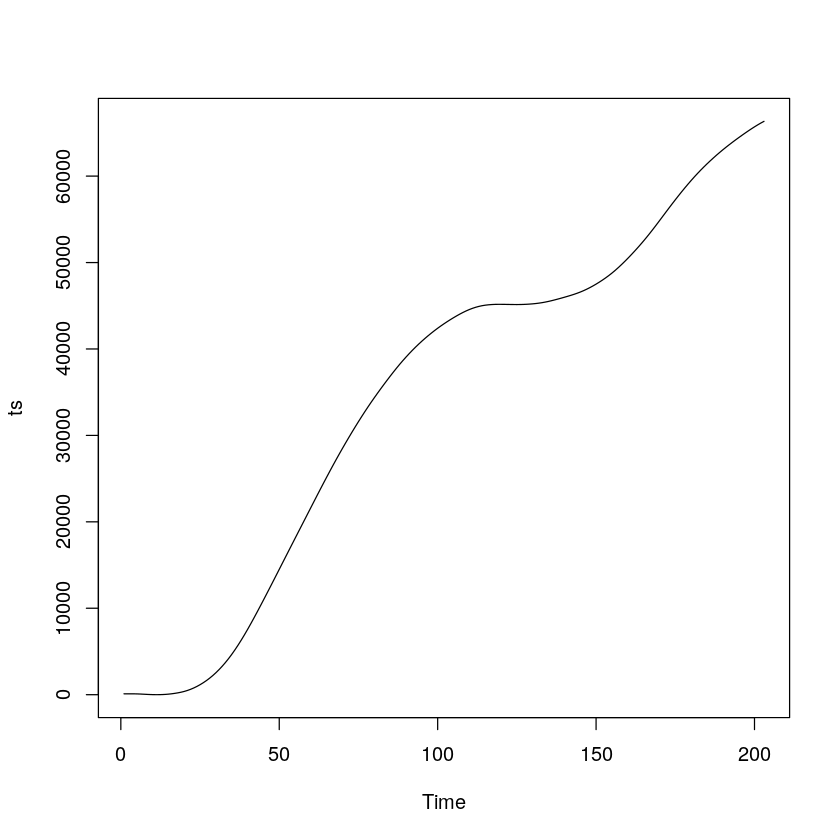

In [8]:
set.seed(1224)
ts = arima.sim(n=200, 
               list(order=c(1,3,1), 
                           ar=c(0.6), 
                           ma=0.7, sd=sqrt(10))) + 100  
# Added the mean outside               
plot(ts)

Find the arima model that fits the data


several ways. first, its clearly nonstationary so we have to figure out how many times we have to difference. 

In [11]:
ndiffs(ts) # tells the number of differences 

[1] 2

In [13]:
auto.arima(ts) # to see what R is thinking the best model is ito aic minimization

Series: ts 
ARIMA(3,2,1) 

Coefficients:
         ar1      ar2      ar3     ma1
      1.4235  -0.3300  -0.1113  0.7669
s.e.  0.1020   0.1857   0.0979  0.0699

sigma^2 estimated as 0.9112:  log likelihood=-277.3
AIC=564.59   AICc=564.9   BIC=581.11

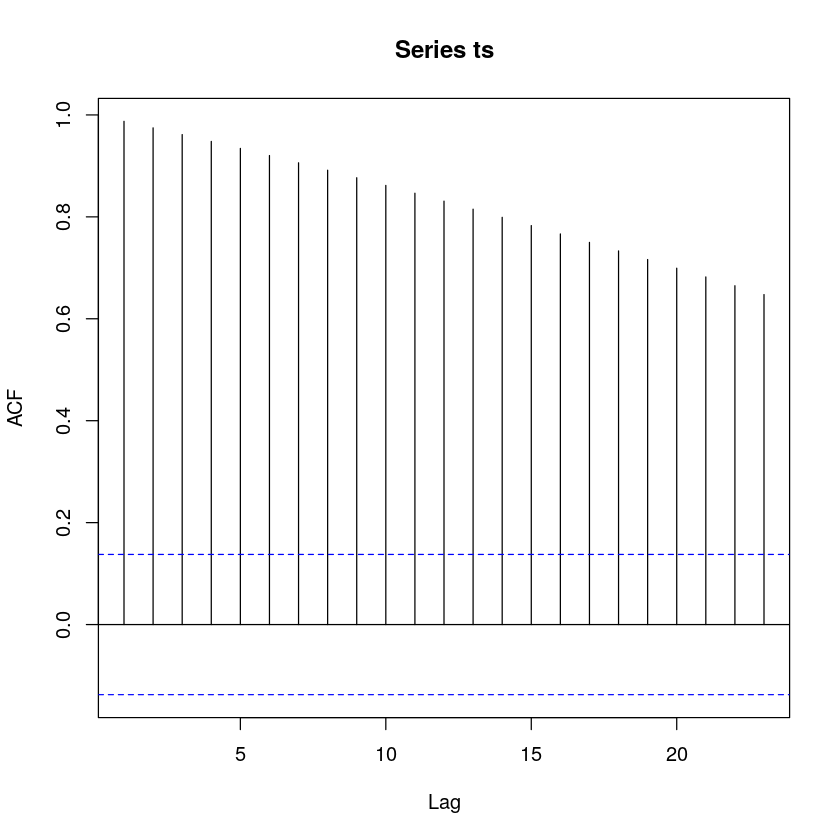

In [14]:
acf(ts) # see a systematic component which is tell me that we need to difference it to make it stationary 

Even tho we gen the data to be 1 3 1 there is variabilitity, auto arima and ndiffs agree that it has to be differenced just twice. 

This also tells us that we cannot always uncover, especially with finite data (just 200 obs), the true structure, especially of nonstationary models.

THM: nonstationairy is such a violent process that we cannot even correctly ID The number of times to difference to make it stationary with 200 obs.
sometimes even with a stationary process we might not be able to recover the exact order due to sampling variation, but thats certainly true with nonstationary arima. and sample size of 200 is nto enough, as you can see we are under differencing here. 

<b> b) </b> parameter estimation





In [ ]:
# auto.arima( )# pl

What he would do is ML is the preferred choice of estimation. which model do we want to try to fit? the one we know is the true model or the one we believed is the true model if we didnt know. 

can try both then look at stat sig of coefs. 

?arima

In [16]:
# fit arima model of any order
arima(ts, order=c(1,3,1), method="ML")  


Call:
arima(x = ts, order = c(1, 3, 1), method = "ML")

Coefficients:
         ar1     ma1
      0.5208  0.7116
s.e.  0.0681  0.0602

sigma^2 estimated as 0.9148:  log likelihood = -275.71,  aic = 555.41

both coefs seemed highly significant. 

In [17]:
arima(ts, order=c(1,3,1), method="CSS")  


Call:
arima(x = ts, order = c(1, 3, 1), method = "CSS")

Coefficients:
         ar1     ma1
      0.5430  0.6824
s.e.  0.0657  0.0606

sigma^2 estimated as 0.9259:  part log likelihood = -276.09

Third option - CSS-ML: unconditional sums of squares. exponent of likelihood without the extra information outside of the exponent about the timeseries coefs. 

In [21]:
arima(ts, order=c(1,3,1), method="CSS-ML")  


Call:
arima(x = ts, order = c(1, 3, 1), method = "CSS-ML")

Coefficients:
         ar1     ma1
      0.5208  0.7116
s.e.  0.0681  0.0602

sigma^2 estimated as 0.9148:  log likelihood = -275.71,  aic = 555.41

How do the methods compare? 

Pretty close of pretty far? pretty close. why is that? 
remember that 
ML is encorporating the entire likelihood info in all the sample. what about the CSS? they are incorp part of the likelihood and all the data with the exception of some IVs. With large samples this would produce similar estimates as close to the ML as can be. thery are consistent estimators so we see very close values. the ML and the unconditional one (CSS-ML) are identical up to four digits past the decimal point.  

P3

a) why MOM not good for param est of MA? TWO REASONS:

1. relationship between sample ACF values and the coefs of the MA process is highly nonlinear, so in order to express/find the coefs using the estimated values of sACF You have to solve nonlinear sys of eqns which is not easy, more importantly due to sampling var you might find values of the sacf that are incompatible with real solutions. with MA1 you can observe SACF greater than 1/2 and less tahn 1/2 which u cannot solve for theta int hat cas.e easy to set up and impossible to produce a real soltuion (ocmplex roots)


Give ex of MA2 that cannot be est with MOM. how can we give ex of MA2 that might not be estimateable using MOM?

extension of gettig even a MA1 with no real solution for the coefs based on extremely large values of the sacf. 

We know if Yt ~MA2 we know sample acf at lag 1 and lag 2 are:

rho 1 = -theta1 + theta1*theta2

rho2 = 

replace rho w r and solve for theta1 and theta 2 

point: show the solutions are given by an eqn that doesnt have real roots, so its quadratic or higher order. 

see eqn of high degree for theta2 so there could be values of r 1 and r2 that might produce complex solusions. soln is nonlinear. every time there is a radical there is a danger of non getting a real solution. 






3b) 

3c)  we did this in class 

f(y2, ..., yn | y1) 

its on pg 159

3d.) unconditional

get the conditional 
times the marginal (using inf order ma rep of AR(1)) 

f(y1...yn) = f(y2,....yn| y1) * f(y1)

combining them we get unconditional jpdf of entire data 

In [ ]:
# acf(diff(ts,2))
# acf(diff(ts,3))

P4) 

4c comment 
It is white noise with a drift. would we trade on a white noise with a drift? 

its saying there is a linear trend, a drift, and there is white noise around it, and instead of swinign around zero its swinging around a trendline going up. RW are a zero mean process but they swing so wildly, once they take off in one direction they dont want to change. even though there is a trend line going up, if it starts swinging the wrong way and the trend changes direction it can be a long while before it comes back. 
Avg number of times a simple RW without a drift revisits the origin. few times. 

4d Auto.arima() chose the best model for us using the maximum likelihood parameter estimation technique. There is a single parameter, which is the slope coef with the drift, which is not significant, as you can see twice the std err is estimated for the drift. 
parametric boostrap - great tool for est std errs of TS coefs. we have to simulate 1000 realizations from the proces sthat generated this particular data and then fitt 1000 models of the exact same type, and exytacy the coefs, and based on those samples, (in this case its silly cuz we dont have ma or ar coefs, but we could still estimate a drift coef and the std errors). construct precise CI around the estimates. sampling wnt from the estimated distribution (N(0,var_model)), rnorm is the command, and construct realizations of the same process. fit that particulation model, extract that coef and save them. at the end we have 1000 samples form the dist of the reg coefs and from those samples we can est coefs and ci's. 

